# Fundamentals of Data Science
Winter Semester 2021

## Prof. Fabio Galasso, Guido D'Amely, Alessandro Flaborea, Luca Franco, Muhammad Rameez Ur Rahman and Alessio Sampieri
<galasso@di.uniroma1.it>, <damely@di.uniroma1.it>, <flaborea.1841969@studenti.uniroma1.it>, <franco.luca.17@gmail.com>, <rahman@di.uniroma1.it>, <alessiosampieri27@gmail.com>

## Exercise 1: Image Filtering and Object Identification

In this exercise you will first familiarise yourself with the basic image filtering routines of Python and NumPy (**Question 1**), then develop a simple image querying system which accepts a query image as input and then finds a set of similar images in the database (**Question 2, 3 and 4**).

This notebook consists of essential functions to solve assignment and questions to be implemented; your task is to fill the missing code "YOUR CODE HERE" part corresponding to each subproblem and produce brief reports on the results whenever necessary.

The filtering part contains two images: *graph.png* and *brick_aliasing.jpg*, which we will use for testing purposes.

In the identification part, you will compare images with several distance functions and evaluate their performance in combination with different image representations. The identification part contains query and model images
for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files model.txt and query.txt contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. The placeholder scripts will also be used to test your solution.

As part of the exercise, provide an answer to questions in this notebook, in a report-like manner. After you have implemented all the missing code in both exercise parts, you should be able to execute those without errors. Use those to support your answers in the report answers.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, damely@di.uniroma1.it, rahman@di.uniroma1.it and alessiosampieri27@gmail.com by Wednesday October 20th, 23:59.


## Question 1: Image Filtering **(9 Points)**

Import some useful libraries

In [1]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math

plt.rcParams["figure.figsize"] = (20,8)

In [2]:
def rgb2gray(rgb):
  '''
  RGB -> gray_scale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 1 - Code **(7 Points)**

#### Exercise 1.a **(3 Points)**


##### 1-D Gaussian Filter
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.


![](https://drive.google.com/uc?export=view&id=1Q3WIdozsroKzinnlyZhgZHFMdYj7KQrw)


In [3]:
def gauss_function(x, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-((x ** 2) / (2 * (sigma ** 2))))

def gauss(sigma):
    """
    Gauss function taking as argument the standard deviation sigma
    The filter should be defined for all integer values x in the range [-3sigma,3sigma]
    The function should return the Gaussian values Gx computed at the indexes x
    """
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    x = [n for n in range(-sigma * 3, (sigma * 3) + 1)]
    
    Gx = [gauss_function(n, sigma) for n in x]

    return Gx, x

################# Do not write below this line just run #################

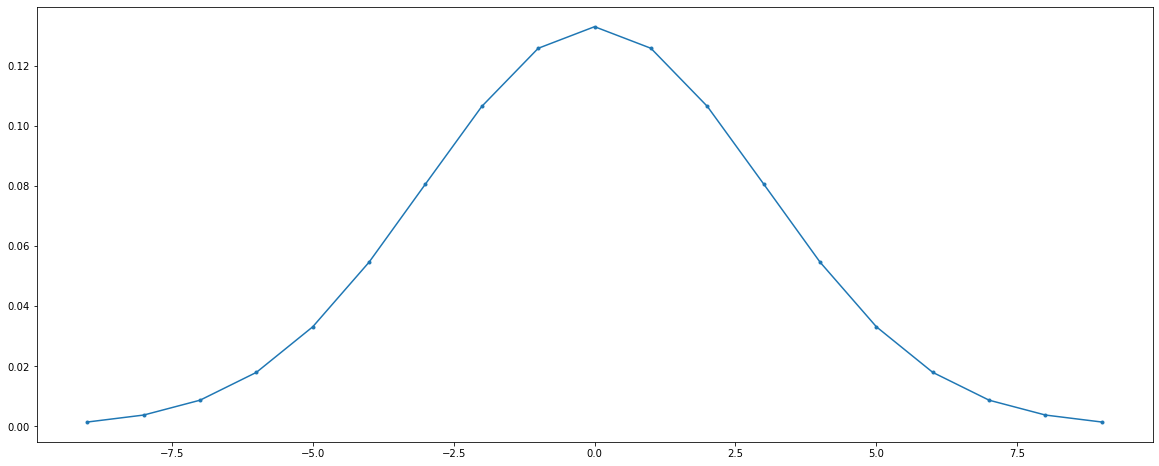

In [4]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### 1-D Box Filter

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](https://drive.google.com/uc?export=view&id=1UBpSRYNkZnK2UGmGsMSnrmzwrPyMt6Fz)

In [5]:
def box(filter_size=3,show_verbose=False):
    """
    box function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the Box values Bx computed at the indexes x
    """
    Bx=[]
    x=[]
    for i in range(-int(filter_size/2), int(filter_size/2) + 1):
        x.append(i)
        Bx.append(1/(filter_size))

    return Bx,x

################# Do not write below this line just run #################

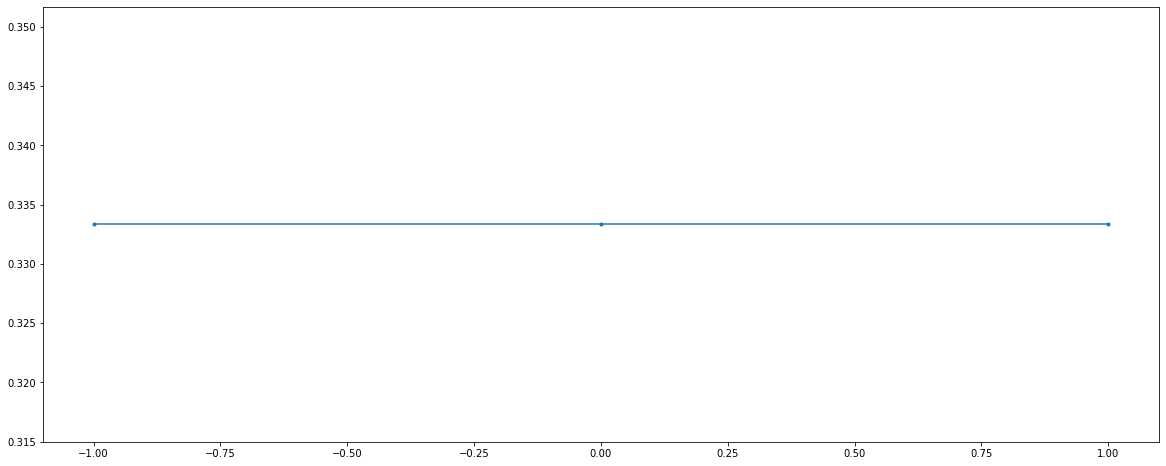

In [6]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### 2-D custom filter
Recreate the given 3x3 filter:

\begin{bmatrix}
-0.015 & -0.035 & -0.015\\
-0.035 & 0.8 &  -0.035 \\
-0.015 & -0.035 & -0.015
\end{bmatrix}

 The absolute value of the elements in the kernel sum to 1, in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign.

In [7]:
def custom():
  
    """
    This function returns the shown kernel.
    """  
    val1 = -0.015
    val2 = -0.035
    val3 = 0.8
    Gx=np.array([[val1,val2,val1],[val2,val3,val2],[val1,val2,val1]])
    return Gx


################# Do not write below this line just run #################

In [8]:
custom_filter = custom()
print(custom_filter)

[[-0.015 -0.035 -0.015]
 [-0.035  0.8   -0.035]
 [-0.015 -0.035 -0.015]]


##### Gauss derivative 1-D
Implement a function gaussdx for creating a Gaussian derivative filter in 1D:
$$
\frac{d}{dx}G =-\frac{1}{\sqrt{2\pi}\sigma^3}x\exp({-\frac{x^2}{2\sigma^2}})
$$
As in 1.a-1.b, the function should also return a vector x of values on which the Gaussian derivative filter is
defined: integer values on the interval $[3\sigma; 3\sigma]$.

An example of Gauss derivative 1-D:

![](https://drive.google.com/uc?export=view&id=1QZmVMxJiOARKe5MoqzZ7SSSjFikoY2ty)

In [9]:
def gauss_derivative_function(x, sigma):
    return (-(1 / (math.sqrt(2 * math.pi) * (sigma ** 3)))) * x * math.exp(-((x ** 2) / (2 * (sigma ** 2))))

def gaussdx(sigma):

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    x = [n for n in range(-sigma * 3, (sigma * 3) + 1)]
    
    Dx = [gauss_derivative_function(n, sigma) for n in x]

    return Dx, x

################# Do not write below this line just run #################

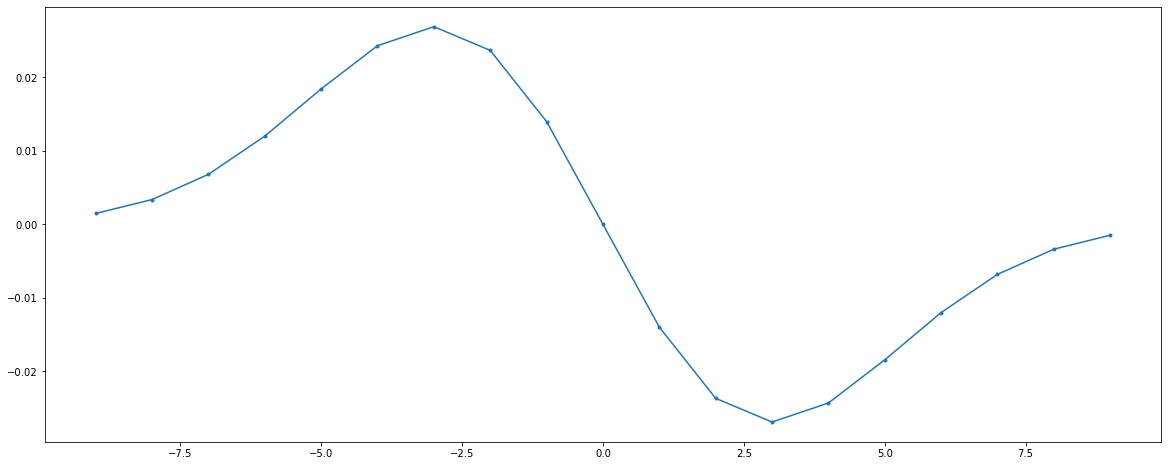

In [10]:
## function gaussdx
sigma = 3
DGx,x = gaussdx(sigma)
plt.figure(1)
plt.plot(x, DGx, '.-')
plt.show()

#### Exercise 1.b **(3 Points)**

Here you have to convolve the filters you have just defined with the given image _'graf.png'_. Remember that "Box" and "Gaussian" filters are separable.

##### 2-D Gaussian filter
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](https://drive.google.com/uc?export=view&id=1GtsTZXlnj811pJi1VnamdtDCvhqHiu8j)



In [11]:
def gaussfiltering(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
  Leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  Gx, x = gauss(sigma)
  Img_y = len(img)
  Img_x = len(img[1])
  img_1=[]
  for i in range(Img_y):
        img_1.append(np.convolve(img[i,],Gx,mode='same'))
    
  img_1= np.array(img_1)
  smooth_img=[]
  for j in range(Img_x):
        smooth_img.append(np.convolve(img_1[:,j],Gx,mode='same'))
    
  ##Da modificare la gestione della immgaine, forse matrici?
  return np.array(smooth_img).T

################# Do not write below this line just run #################

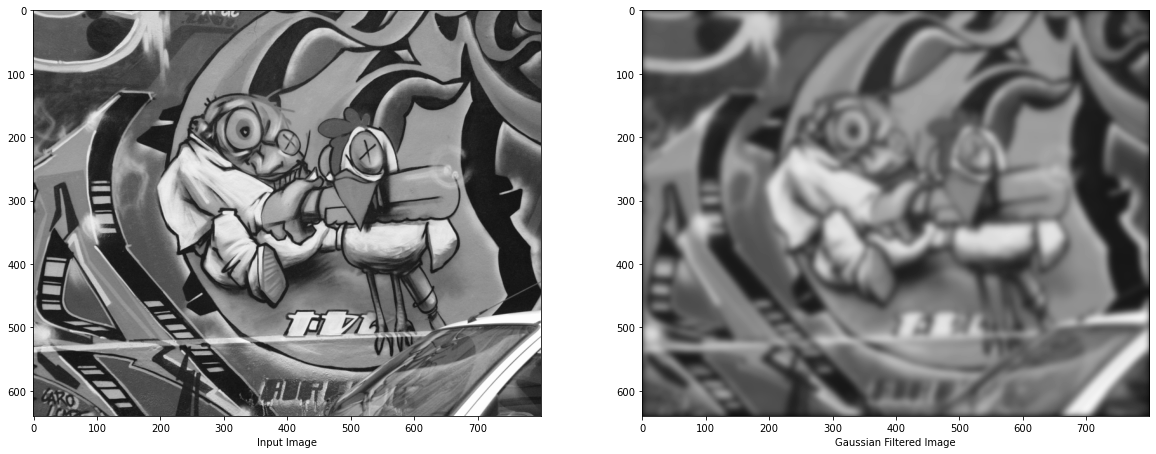

In [12]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gaussfiltering(img, 5)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### 2-D Box filter
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](https://drive.google.com/uc?export=view&id=1IMrJUuTouVHmaiiyWB6H1QbKLzYTg9qC)



In [13]:
def boxfiltering(img, filter_size):
    """
     Implement a 2D Box filter, leveraging the previous box.
     Leverage the separability of Box filtering
     Input: image, filter_size
     Output: smoothed image
     """
    Gx, x = box(filter_size)
    Img_y = len(img)
    Img_x = len(img[1])
    img_1=[]
    for i in range(Img_y):
        img_1.append(np.convolve(img[i,],Gx,mode='same'))
    
    img_1= np.array(img_1)
    
    smooth_img=[]
    for j in range(Img_x):
        smooth_img.append(np.convolve(img_1[:,j],Gx,mode='same'))
    
    ##Da modificare la gestione della immgine, forse matrici?
    return np.array(smooth_img).T

################# Do not write below this line just run #################

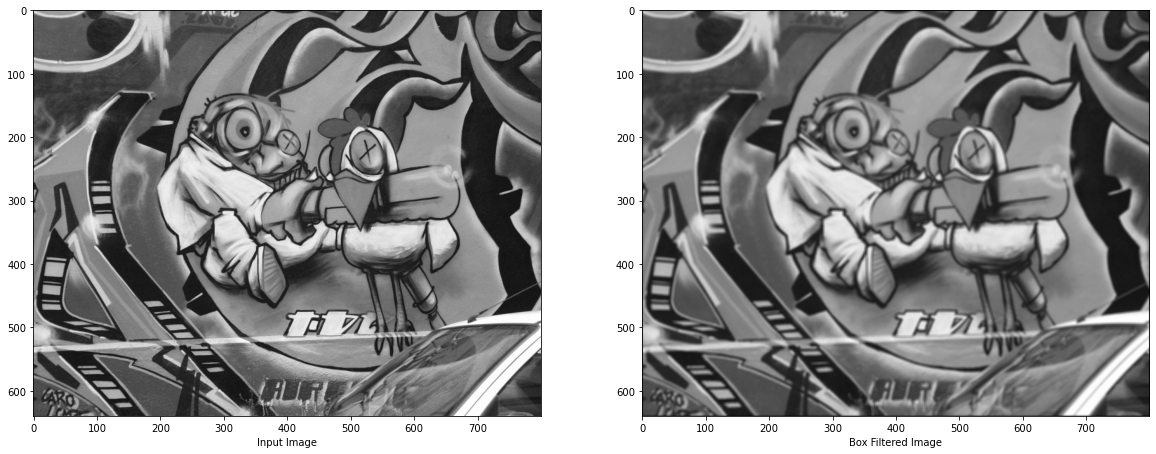

In [14]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = boxfiltering(img, 5)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### Custom Filter

The function should take an image and return the result of the convolution of this image with the custom filter we have defined in exercise 1.a.

See figure below for an illustration of this custom filter.

![](https://drive.google.com/uc?export=view&id=1N1wEkhqOuAX3TusQNNxN9KPOXb9nRsFn)



In [15]:
def customfiltering(img):
    """
  Implement a 2D Custom filter
  Implement the filter from scratch 
  Input: image
  Output: smoothed image
  """
    custom_filter = custom()
    smooth_img=conv2(img,custom_filter,mode='same')

    return np.array(smooth_img)

################# Do not write below this line just run #################

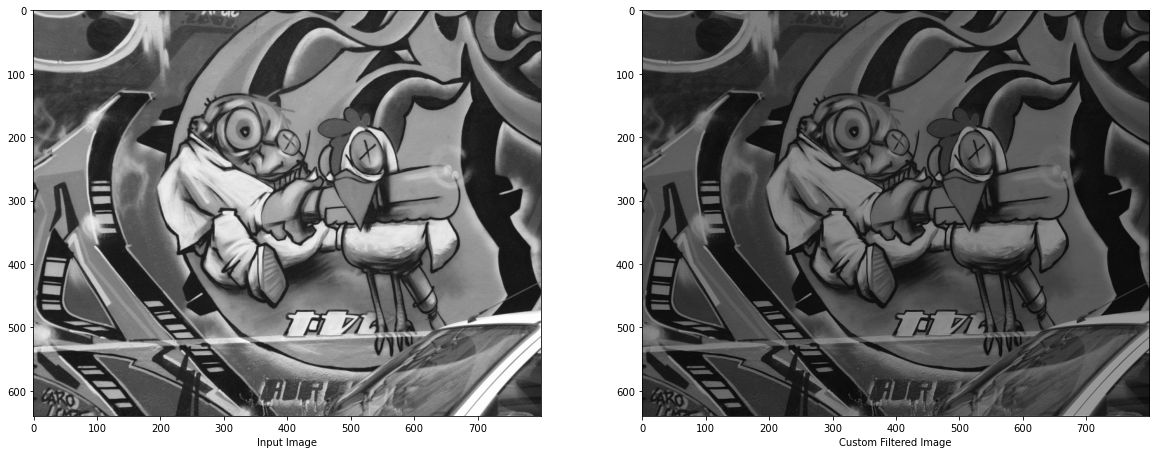

In [16]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### Exercise 1.c **(1 Points)**

Implement a Gaussian Pyramid: Write a function for downscaling (you can use the function [resize from cv2](https://docs.opencv.org/master/dd/d52/tutorial_js_geometric_transformations.html) library) and use the Gaussian filter to blur it. The Pyramid must consist of three steps: 

* Apply Gaussian filter on original Image
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.

See figure below for an illlustration of Gaussian Pyramid.
![](https://drive.google.com/uc?export=view&id=1JKeyNozWgoBWHqrUwj4SEF6SJEnO9uMt)


In [17]:
def downscale(img, factor):
  '''
  This function should return the given image
  resized by the factor.
  Input:
    img: the image to resize
    factor: the factor you want use to downscale
  Output:
    resized: the resized image
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
 # resized_img = img

  width = int(img.shape[1] * factor)
  height = int(img.shape[0] * factor)
  dim = (width, height)
  resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)



  return resized_img

In [18]:
def GaussianPyramid(img, steps=3, factor=0.5, sigma=4):
  '''
  This function implements the Gaussian Pyramid and shows the results.
  Leverage the "downscale" function.
  
  Inputs:
    img: the image
    steps: number of steps to use in performing the Pyramid
    factor: the scaling factor to resize the image at each step
    sigma: the Gaussian filter parameter
  
  Output:
    --
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  figures = steps * 2
  plt.figure(7)
  for i in range(steps):
   #   imgs.append(img)
      img2 = gaussfiltering(img, sigma)  
 #     plt.figure(figsize=(50/(i+1), 25/(i+1)), dpi=80)
      plt.figure(figsize=(36/(i+1),24/(i+1)))
      ax1 = plt.subplot(steps,2,i*2+1)
  #    ax1.set_xlabel('Input Image')
      ax2 = plt.subplot(steps,2,i*2+2)
  #    ax2.set_xlabel('Custom Filtered Image')
      plt.sca(ax1)
      plt.imshow(img, cmap='gray', vmin=0, vmax=255)
      plt.sca(ax2)
      plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
      #imgs.append(imgs.append(img2))
      img = downscale(img2, factor)
  plt.show()
  return

################# Do not write below this line just run #################

<Figure size 1440x576 with 0 Axes>

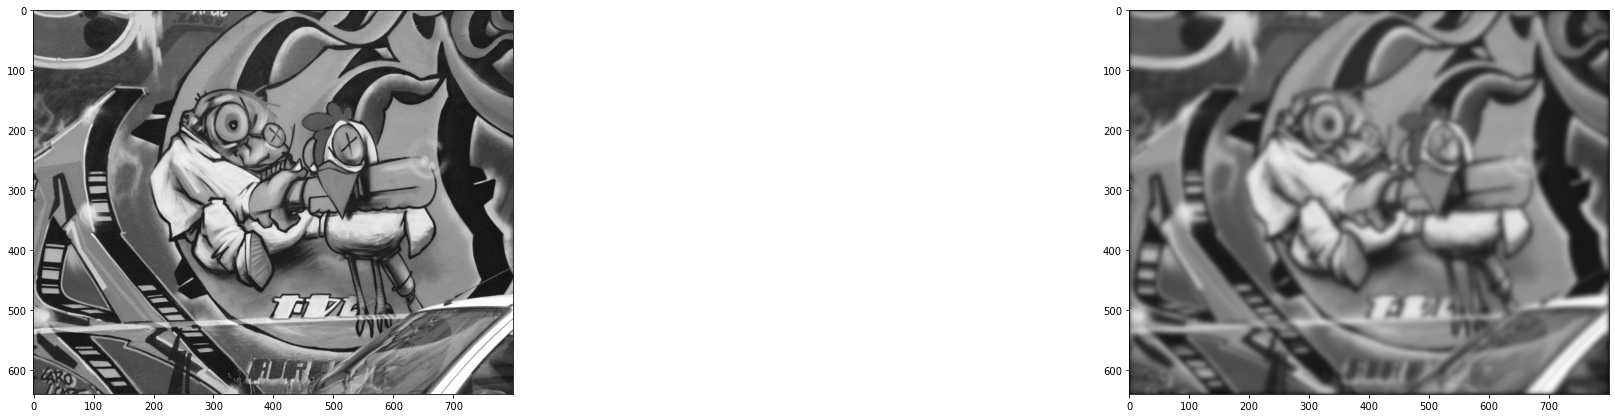

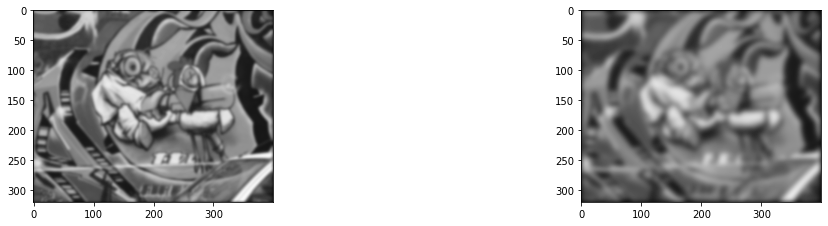

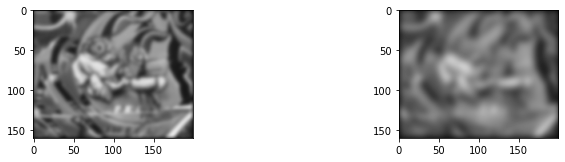

In [19]:
img = rgb2gray(np.array(Image.open('graf.png')))
GaussianPyramid(img)

### Exercise 1 - Report **(2 Points)**

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
In report, you should also compare your results: use the three filters you just created and apply on 'brick_aliasing.jpg' file and identify which filter is applied on Image A, Image B and Image C illustrated in Figure below. Use 7 as filter_size both for Gaussian and Box filter.

![](https://drive.google.com/uc?export=view&id=1eDOTU7FIRht9WMiAeW3ZlsFnpAlW_ZGm)

**Write your Report here**
 
 
In this excercise we applied the image filtering concepts we studied in class using different filters.
  
 - Given a certain kernel, we implemented the functions that, with an image in input, apply the convolution of values from the original image and assign those values in a new image, the filtered output. Applying the convolve 1D function means multiply every value of a kernel (a vector of N weights) for every N pixels in a certain row (the first 0 to N, then the 1 to N+1, and so on) and assign the product of the multiplication pixel_images * kernel  to the output filtered image.
  
-  In the implementation of the functions we used the logic of the separabilty of linear filters:an N-dimensional convolution is equivalent to N times 1-D convolutions, so for the filters in 2D we applied the 1D filter 2 times, in every row and then in every column.
  
-  We coded and tested the behaviour of the Gaussian filter, that smoothes and blur the pixels, like in image A. The Gaussian filter implemented, _gaussfiltering_ , have a kernel were the weights of the pixel are given by the probability distribution of a Gaussian function. The central pixel and the nearby have higher value, while the distant ones have less influence in the multiplication process. We used the separability and applied first a 1D Gauss filter in the rows and then a 1D Gauss in the columns.
 
- The Box-filter we implemented, _boxfiltering_ use a uniformly distributed kernel, so the smoothing of the pixel behaves differently from the Gaussian. This filter also was implemented with the separability concept. Testing this filter with the brick_aliasing.jpg image, we see that corresponds to Image B, less blurried and more uniform in the smoothing process.
 
- The Custom Filter _customfiltering_ coded has, instead, a kernel that corresponds to a contrast/sharpening of the photo. Analyzing the kernel in fact we can see how the central value is enhanced while the neighboring are decreased in value: this gives the sharpening effect that we can see in Image C.
 
 
- Image A filter -> Gaussian
- Image B filter -> Box
- Image C filter -> Custom

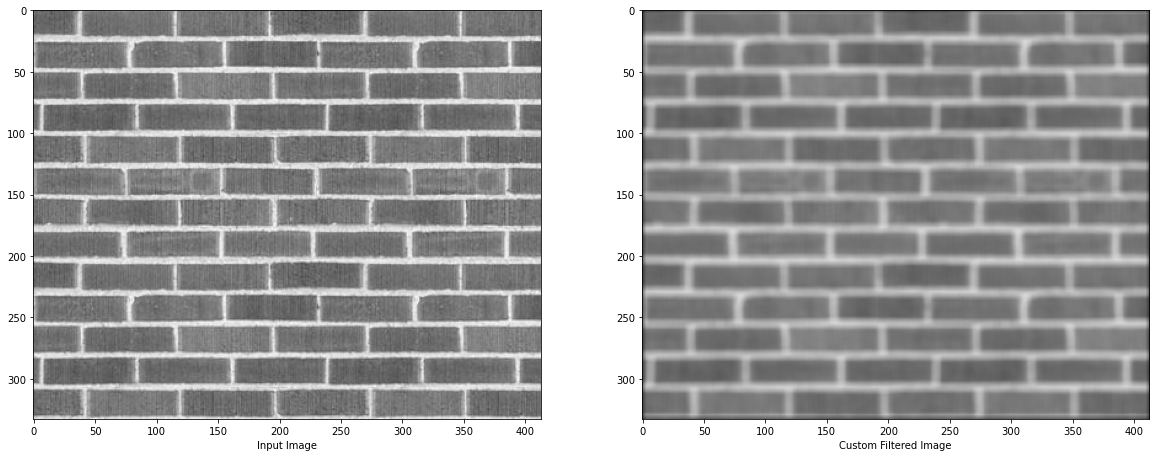

In [54]:
img = rgb2gray(np.array(Image.open('brick_aliasing.jpg')))
sigma=7
#smooth_img = gaussfiltering(img,sigma)
smooth_img = boxfiltering(img,sigma)
#smooth_img = customfiltering(img)

#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

## Question 2: Identification **(10 Points)**

Import some useful libraries

In [20]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [21]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 2 - Code

#### Exercise 2.a **(3 Points)**
For this question,  implement the
function **normalized hist**, which takes gray-value image as input and returns normalized histogram of
pixel intensities. When quantizing the image to compute the histogram, consider that pixel intensities
range in $[0, 255]$.
Compare your implementation with built-in Python function numpy.histogram. Your histograms and
histograms computed with Python should be approximately the same. (3 points)

In [22]:
def normalized_hist(img_gray, num_bins = 10, show_verbose = False):
  '''
  Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
  assume that image intensity is between 0 and 255

  img_gray - input image in grayscale format
  num_bins - number of bins in the histogram
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################'''
  #tot = 0
  img_gray_r = img_gray.reshape(img_gray.size)
  hists = np.zeros((num_bins,), dtype=int)

  bins = np.arange(0, 255+(255/(num_bins)), 255/(num_bins))
  step = bins[1]
  for p in img_gray_r:
    k = int(p/step)
    hists[k] += 1
    
  hists = hists[:]/len(img_gray_r)
  return hists, bins

################# Do not write below this line just run #################

In [23]:
num_bins = 5
bins = np.arange(0, 10+(10/(num_bins)), 10/(num_bins))
print(bins)
bins = np.arange(0, 10.1, 11/(num_bins))
print(bins)


num_bins = 20
bins = np.arange(0, 255+(255/(num_bins)), 255/(num_bins))
print(bins)
bins = np.arange(0, 255, 256/(num_bins))
print(bins)


[ 0.  2.  4.  6.  8. 10.]
[0.  2.2 4.4 6.6 8.8]
[  0.    12.75  25.5   38.25  51.    63.75  76.5   89.25 102.   114.75
 127.5  140.25 153.   165.75 178.5  191.25 204.   216.75 229.5  242.25
 255.  ]
[  0.   12.8  25.6  38.4  51.2  64.   76.8  89.6 102.4 115.2 128.  140.8
 153.6 166.4 179.2 192.  204.8 217.6 230.4 243.2]


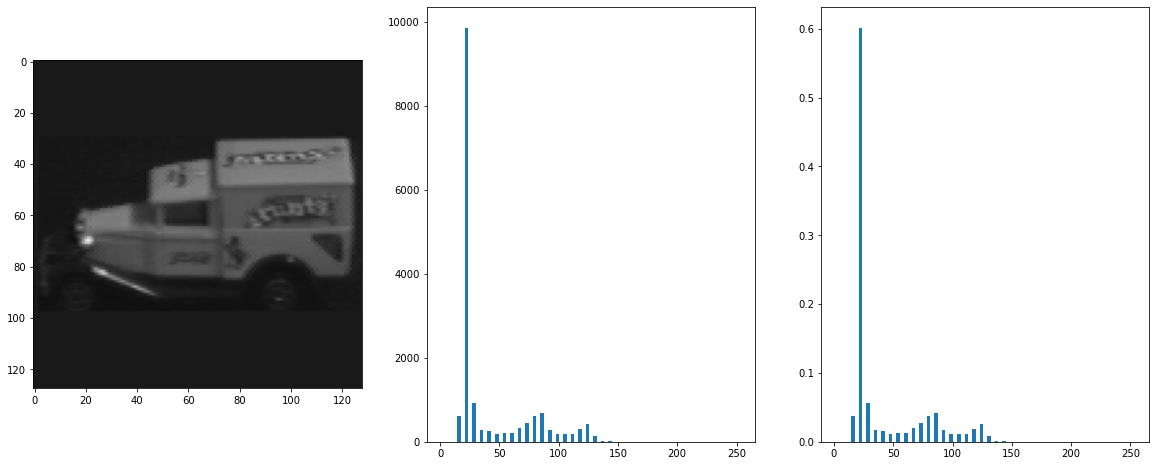

In [24]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)
#print(bin_gray1[0:-1])
#print(bin_gray1[1:])
#print(hist_gray1)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
#print(bin_gray2[0:-1])
#print(bin_gray2[1:])
#print(hist_gray2)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)

plt.show()

#### Exercise 2.b **(6 Points)**
Implement the histogram types. Your implementation should
complete the scripts provided in the functions rgb_hist, rg_hist and dxdy_hist.
As above, when quantizing the images to compute the histogram, consider that “RGB” and “RG” range in
$[0, 255]$. For the case of dxdy hist, the actual image value ranges depend on the chosen Gaussian filtering
variance, used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$, i.e. set all values below (above) the value of -6 (+6) to -6
(+6). (3 points)

##### RGB

In [25]:
def rgb_hist(img_color_double, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram for each color channel in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3

  E.g. hists[0,9,5] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
      - their B values fall in bin 5
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  x = img_color_double.shape[0]
  y = img_color_double.shape[1]
  hists = np.zeros((num_bins, num_bins, num_bins), dtype=int)
  bins = np.arange(0, 255+(255/num_bins), 255/(num_bins))
  step = bins[1]
  for x1 in range(x):
    for y1 in range(y):  
        r = int(img_color_double[x1, y1, 0]/step)
        g = int(img_color_double[x1, y1, 1]/step)
        b = int(img_color_double[x1, y1, 2]/step)
        if r == num_bins:
            r = num_bins -1
        if g == num_bins:
            g = num_bins -1
        if b == num_bins:
            b = num_bins -1
        hists[r, g, b] += 1
  hists = hists[:, :, :]/(x*y)
  hists = hists.reshape(hists.size)
  return hists

################# Do not write below this line just run #################

<BarContainer object of 125 artists>

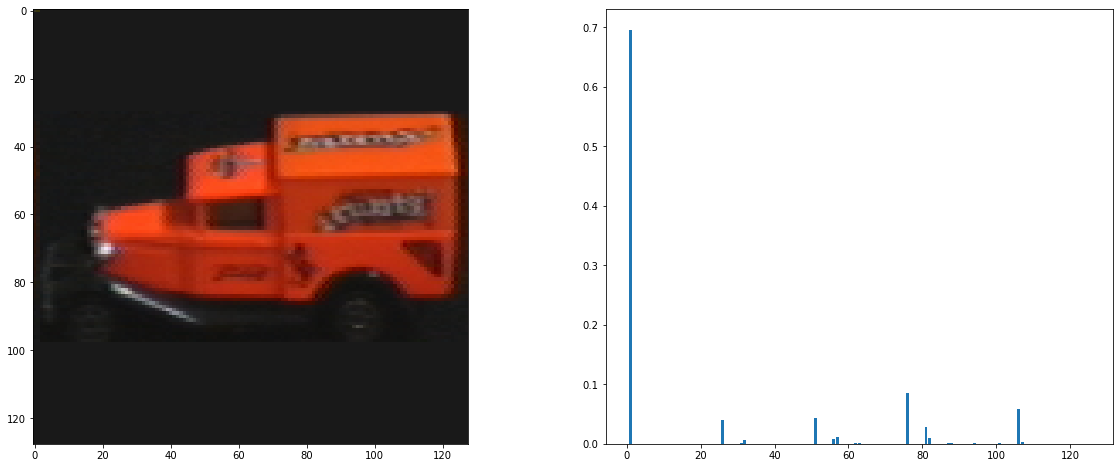

In [26]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)

##### RG

In [27]:
def rg_hist(img_color_double, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram for the R and G color channels in the image
    The histogram should be normalized so that sum of all values equals 1
    Assume that values in each channel vary between 0 and 255

    img_color - input color image
    num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

    E.g. hists[0,9] contains the number of image_color pixels such that:
        - their R values fall in bin 0
        - their G values fall in bin 9
    '''
    
    x,y,z = img_color_double.shape     #defining the dimension of x, y and z
    
    bins_length=255/num_bins     #the lenght of a bin in pixel values
    #print(bins_length)
    hists= np.zeros((num_bins, num_bins), dtype=int)  #creating a empty hist 3Darray
    for i in range(x):
        for j in range(y):
            bin_r=int(img_color_double[i][j][0]/bins_length)  ##this are the bins category of the R i-j th pixel
            bin_g=int(img_color_double[i][j][1]/bins_length)  #
            #print(bin_r,bin_g,bin_b)
            if bin_r == num_bins:
                bin_r = num_bins -1
            if bin_g == num_bins:
                bin_g = num_bins -1
            hists[bin_r][bin_g] +=1  #increment the relative hists element of the bin_r,bin_g,bin_b value
    hists=hists/(x*y) #normalizng the values
    hists=hists.reshape(hists.size) #reshaping from 3d to 1 dimension
    return hists

################# Do not write below this line just run #################

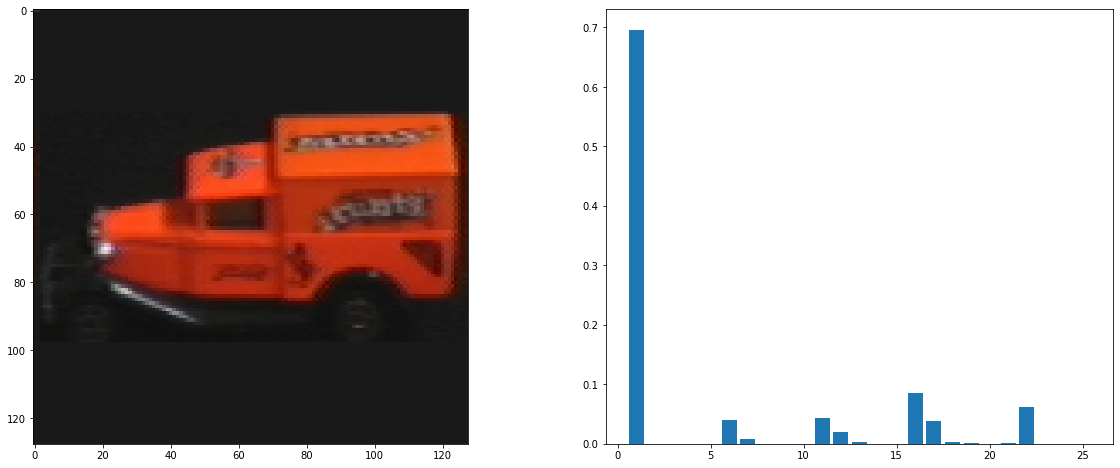

In [28]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)

plt.show()

##### DXDY

In [29]:
def gaussderiv(img, sigma):

    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    Gx, x = gaussdx(sigma)
    imgDx = np.copy(img)
    imgDy = np.copy(img)
    
    for x in range(len(imgDx)):
        imgDx[x] = convolve(imgDx[x], Gx, mode = 'same')
    
    for y in range(len(imgDy[0])):
        imgDy[:, y] = convolve(imgDy[:, y], Gx, mode = 'same')
    
    return imgDx, imgDy

In [30]:
def dxdy_hist(img_gray, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
    Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
    The histogram should be normalized so that sum of all values equals 1
    
    img_gray - input gray value image
    num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
    
    Note: you can use the function gaussderiv from the Filtering exercise
    '''
    
    #####################################################
    ##                 YOUR CODE HERE                  ##
    #####################################################
    
    sigma = 3
    imgDx, imgDy = gaussderiv(img_gray, sigma)
    
    imgDx = np.where(imgDx < -6, -6, imgDx)
    imgDy = np.where(imgDy < -6, -6, imgDy)
    imgDx = np.where(imgDx > 6, 6, imgDx)
    imgDy = np.where(imgDy > 6, 6, imgDy)
    
    step = 12 / num_bins
    hists = np.zeros((num_bins, num_bins), dtype = int)
    
    for i in range(len(img_gray)):
        for j in range(len(img_gray[0])):
            x = int((imgDx[i, j] + 6) / step)
            y = int((imgDy[i, j] + 6) / step)
            
            if x >= num_bins: x -= 1
            if y >= num_bins: y -= 1
            hists[x, y] += 1
    
    tot = np.sum(hists)
    hists = hists / tot
    hists = np.reshape(hists, -1)
    
    return hists

################# Do not write below this line just run #################

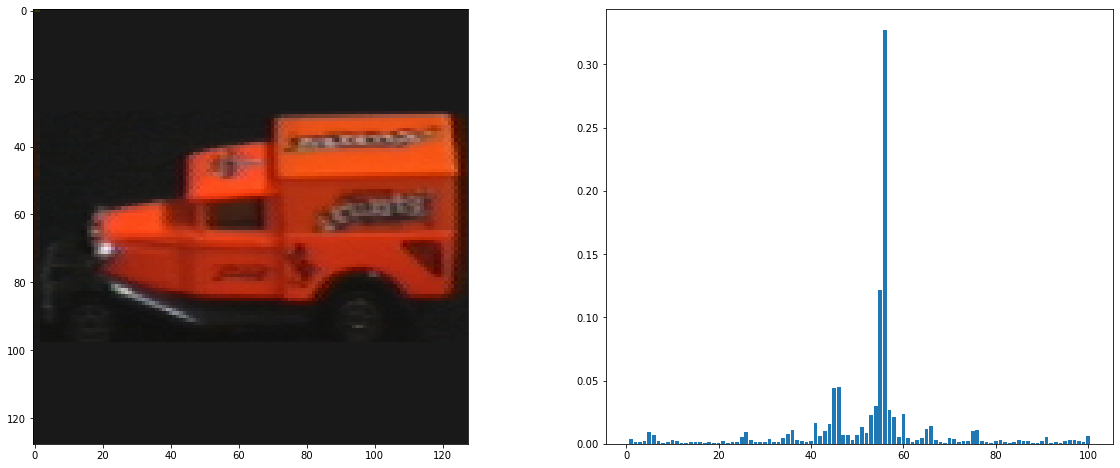

In [31]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)

plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

#### Exercise 2.c **(1 Point)**
Implement the histogram distance functions. 

In more details, implement the function *dist_intersect*:
\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

the *dist_l2* function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

and the *dist_chi2*:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [32]:
def dist_intersect(x,y):
  '''
  Compute the intersection distance between histograms x and y
Return 1 - hist_intersection, so smaller values correspond to more similar histograms
Check that the distance range in [0,1]
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  l = len(x)
  if len(y) < l:
        l = len(y)
  
  a = 0
  b = 0
  c = 0

  for i in range(l):
    if x[i] < y[i]:
        a += x[i]
    else:
        a += y[i]
    b += x[i]
    c += y[i]

  hist_intersection = 0.5 * ((a/b) + (a/c))
  
  return 1 - hist_intersection


def dist_l2(x,y):
  '''
  Compute the L2 distance between x and y histograms
  Check that the distance range in [0,sqrt(2)]
  '''
    
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  l = len(x)
  if len(y) < l:
        l = len(y)
  sum = 0
  
  for i in range(l):
    sum += (x[i]-y[i])*(x[i]-y[i])

  l2_dist = math.sqrt(sum)

  return l2_dist


def dist_chi2(x,y):
  '''
  Compute chi2 distance between x and y
  Check that the distance range in [0,Inf]
  Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  l = len(x)
  if len(y) < l:
        l = len(y)
  chi2_dist = 0
  for i in range(l):
    a = (x[i]-y[i])**2
    b = x[i]+y[i]+2
    if b == 0:
        chi2_dist = 0
    else: chi2_dist += a/b
        

  return chi2_dist

## Question 3: Object Identification **(11 Points)**

### Exercise 3 - Code **(7 Points)**

#### Exercise 3.a **(4 Points)**
Having implemented different distance functions and image histograms, you can now test how suitable
they are for retrieving images in query-by-example scenario. Implement a function find_best_match which takes a list of model images and a list of query images and for each query im-
age returns the index of closest model image. The function should take string parameters, which identify
distance function, histogram function and number of histogram bins. See comments in the beginning of
find_best_match function for more details. Additionally to the indices of the best matching images your implemen-
tation should also return a matrix which contains distances between all pairs of model and query images.
(3 points)

In [33]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    pass
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [34]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
  '''
  this function returns a list containing the histograms for
  the list of images given as input.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  image_hist = []
  if hist_isgray:
    for img in image_list:  
        img = rgb2gray(img.astype('double'))
        if hist_type == 'grayvalue':
            hist = get_hist_by_name(img, num_bins, hist_type)[0]
        else:
            hist = get_hist_by_name(img, num_bins, hist_type)
        image_hist.append(hist)
  else:
    for img in image_list:
            img = img.astype('double')
            hist = get_hist_by_name(img, num_bins, hist_type)
            image_hist.append(hist)
    
  return image_hist



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  Function to find the best match for each image in the 
  query folder.
  Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "rg", "dxdy".
  
  Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  print("find_best_match start")  
  img_models = []
  for f in model_images:
        img_models.append(np.array(Image.open(f)))
  img_queries = []
  for f in query_images:
        img_queries.append(np.array(Image.open(f)))      
  hist_isgray = is_grayvalue_hist(hist_type)
  models_hist = compute_histograms(img_models, hist_type, hist_isgray, num_bins)
  queries_hist = compute_histograms(img_queries, hist_type, hist_isgray, num_bins)
  
  best_match = np.zeros((len(img_models,)), dtype=int)
  D =  np.zeros((len(img_models),len(img_queries)))
     
  for x in range(len(models_hist)):
        min = -1
        for y in range(len(queries_hist)):
            dist = get_dist_by_name(models_hist[x], queries_hist[y], dist_type)
            D[x,y] = dist 
            if dist < min or min == -1:
                min = dist
                best_match[x] = y

  return best_match, D

################# Do not write below this line just run #################

In [74]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

dist_type = 'intersect'
hist_type = 'rgb'
num_bins = 5

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)
print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

find_best_match start
Indexes of correct retrieved images is:
  [ 1  2  3  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 25 26 27
 28 29 30 33 34 35 36 37 38 39 41 42 44 45 46 48 49 51 52 54 55 56 57 58
 59 60 61 64 66 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 84 86 87 88]
The Recognition rate is 0.8089887640449438


#### Exercise 3.b **(3 Points)**
Implement a function **show_neighbors** which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric. Use the function find best match in your implementation. See the Figure below for example of the output.

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [42]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

  Note: use the previously implemented function 'find_best_match'
  Note: use subplot command to show all the images in the same Python figure, one row per query image
  
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  [best_match, D] = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
  rows = len(query_images)
  indices = np.zeros((5, rows), dtype=int)
  scores = np.zeros((5, rows))
  indices = indices - 1
  scores = scores -1
  for row in range(rows):
        for model in range(len(model_images)):
            for i in reversed(range(5)):
                if D[model, row] < scores[i, row] or scores[i, row] == -1 :
#                    indices[i, row]
                    if i < 4:
                        scores[i+1, row] = scores[i, row]
                        indices[i+1, row] = indices[i, row]

                    scores[i, row] = D[model, row]
                    indices[i, row] = model


  for row in range(rows):
      plt.figure(5)
      plt.subplot(rows,6,1+row*6)
      plt.imshow(np.array(Image.open(query_images[row])))
      for i in range(5):
          plt.subplot(rows,6,i+2+row*6)
          plt.imshow(np.array(Image.open(model_images[indices[i, row]])))
  return

################# Do not write below this line just run #################

find_best_match start


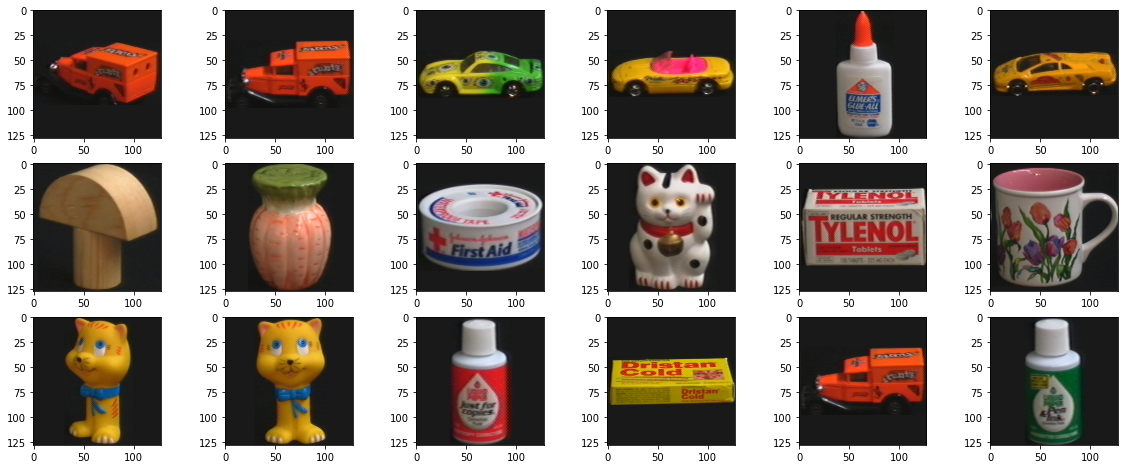

In [53]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

#### Metric
 Use the function find best match to compute recognition rate for different combinations of distance and
histogram functions. The recognition rate is given by a ratio between number of correct matches and total
number of query images.


################# Do not write below this line just run #################

In [51]:
num_correct = sum(best_match == range(len(query_images)))
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 58 (0.651685)



### Report **(4 Points)**

Experiment with different functions and numbers of histogram bins, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


#### **Write your Report here**


We analyzed the different outcomes of accuracy in response to different values of Bins (from 5 to 25) and distance functions applied to the RGB histogram. Under this report there is a table with values at 5-10-15-20-25 Bins, and also a more complete graph that represents how the various distances perform for every Bin from 5 to 25

- The first result to observe is that the _intersect_ distance generate consistently the best accuracy results against the _chi2_ and _l2_ distances, as the graph below shows. The trend of the distances appears to not have a linear outcome: increasing the number of bins does not correspond to a growing accuracy every time. 
- The trend of accuracy calculated in _l2_ and _chi2_ tends to decrease with higher values of bins: the maximum accuracy (0.707) for _l2_ is at Bin 6 and 7, and the maximum for _chi2_ is also at Bin = 7, accuracy 0.76. From this point on, with the growth of the number of Bins there is no growth of the accuracy, in fact we reach some levels of very low accuracy around the 20-th bin.
- The _intersect_ distance otherwise tends to have a more costant trend, not decreasing with higher bins. In general, the bins higher than 10 have a better accuracy then the first low bins. The outcome of this _intersect_ function cannot however be  described as increasing, but oscillates between 0.8 and 0.9, with a maximum of 0.94 accuracy at 23 bins tested. 
- We can assume for higher values of Bins that the trend of oscillation will continue without a stable point of maximum and minimum.

|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 5 | intersect | 0.81 |
| 2 | 10 | intersect | 0.79 |
| 3 | 15 | intersect | 0.91 |
| 4 | 20 | intersect | 0.81 |
| 5 | 25 | intersect | 0.89 |
| 6 | 5 | chi2 | 0.75 |
| 7 | 10 | chi2 | 0.61 |
| 8 | 15 | chi2 | 0.65 |
| 9 | 20 | chi2 | 0.46 |
| 10 | 25 | chi2 | 0.56 |
| 11 | 5 | l2 | 0.69 |
| 12 | 10 | l2 | 0.55 |
| 13 | 15 | l2 | 0.61 |
| 14 | 20 | l2 | 0.44 |
| 15 | 25 | l2 | 0.50 |
| 16 | 23 | intersect | 0.94 |

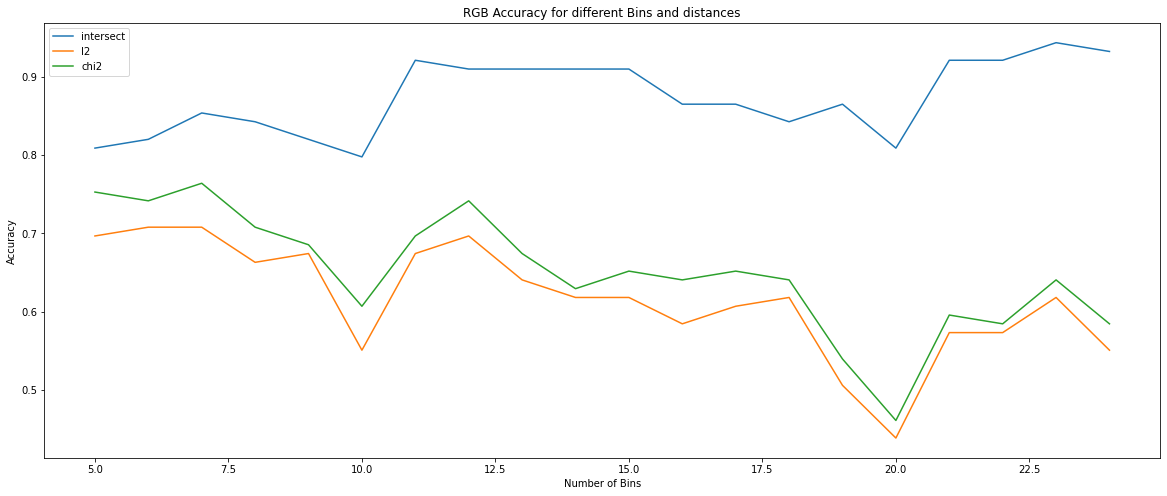

## Question 4: [K-Means]((https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)) 
###(Bonus question for **5 Points**, not compulsory)

Recolor the original images and Query images by using Kmeans. And find the best matches between the two.

There are several way to preprocess an image, and in this exercise you will work with "recoloration". Given an image, you will use a Kmeans model to transform it, and use the same model to transform the images that belongs to the model folder, then repeat the previous to exercises to extract the RGB hist and find the best match. We'll provide the method to fit a KMeans model on an image and to transform an image given a KMeans model. You should then use these functions, applying them on the query images (to retrieve recolored images and a KMeans_model for each query image) and on the model images. Pay attention on the fact that you should use a model fitted on a query image on the whole model folder to have coherent results.

In the following example, the KMeans model has been fitted on three different images: [Row 1] then these models are used to transform original images to recolored images [Row 2:4]

![](https://drive.google.com/uc?export=view&id=1m0Wu2n12BflIwMHL1g3LUxHurotxrPWr)

#### Exercise 4 - Code **(3 Points)**


In [92]:
from sklearn.cluster import KMeans
import numpy as np

def fitting_kmeans(query, K):
  '''
  fit a Kmeans model on 1 image.
  return the recolored image and the KM model
  '''
  shape_ = query.shape

  kmeans = KMeans(K)
  data = query.reshape(-1, 3)
  kmeans.fit(data)
  query_recolored = kmeans.cluster_centers_[kmeans.predict(data)]

  return query_recolored.reshape(shape_), kmeans


def apply_kmeans(km_model, model_image):
  '''
  transform with a Kmeans model 1 image.
  return the recolored image.
  '''

  shape_ = model_image.shape
  data = model_image.reshape(-1, 3)
  img_recolored = km_model.cluster_centers_[km_model.predict(data)]

  return img_recolored.reshape(shape_)

In [93]:
def compute_KM_histograms(image_list, num_bins=10):
  '''
  Function to compute histograms of a list of images.
  Leverage the "rgb_hist" function previously coded.
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  image_hists = []
  for img in image_list:
        hist = get_hist_by_name(img, num_bins, 'rgb')
        image_hists.append(hist)
           

  return image_hists

In [94]:
def compute_KMeans(model_list, query_list, K):
  '''
  Function to compute the recolored images from both query and 
  model lists. You should:
    1. Apply the fitting metod to queries retrieving the list of recolored
       queries and KMeans models.
    2. Apply the transforming method on all the images in the model folder
       for each KMeans you fitted in the previous step.
    3. Return the 2 lists of recolored images.
  '''
  query_recolored_imgs = []
  query_km_models = []
  model_recolored_imgs = []

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  for query in query_list:
        query_recolored, query_km = fitting_kmeans(query, K)
        query_recolored_imgs.append(query_recolored)
        query_km_models.append(query_km)
        model_recolored = []
        for model in model_list:
            model_recolored.append(apply_kmeans(query_km, model))
        model_recolored_imgs.append(model_recolored)

  return query_recolored_imgs, model_recolored_imgs


def compute_recolored_hists(query_recolored, model_recolored):
  '''
  Function to compute the histograms of lists of images.
  Use the compute_KM_histograms function.
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  query_hists = compute_KM_histograms([query_recolored])
  model_hists = compute_KM_histograms(model_recolored)
  query_hists = query_hists[0]
  return query_hists, model_hists


def compute_matching(q_hists, m_hists, dist_type):
  '''
  Function to compute the scores among several histograms.
  Similarly to find_best_match function you have previously defined,
  this function will return the best_match list.

  EXTRA: add the 'all' dist_type wich compute the scores for all 3 
  kind of distances, exploiting the strength of modulation!
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  print(dist_type)
  best_match = np.zeros((len(q_hists)), dtype = 'int')
  for x in range(len(q_hists)):
    min = -1
    model_hists = m_hists[x]
    for y in range(len(model_hists)):
        dist = get_dist_by_name(q_hists[x], model_hists[y], dist_type)
        #  D[x,y] = dist 
        if dist < min or min == -1:
            min = dist
            best_match[x] = y

  return best_match

def print_corrects_KM(match, tot_q_images, dist_type, K):
  '''
  Function to print the results.
  Input:
    match: the best_match results
    tot_images: len(model_images)
    dist_type: among 'l2', 'intersect' and 'chi2' (EXTRA: 'all')
    K: K-Means parameter
  
  last three args should be expicitly printed by this function.
  
  Example of Output:

  Settings: K=30, dist=chi2
  Results: Number of correct matches: 58/89 (65.17%)
  '''
  num_correct = sum(match == range(len(query_images)))
  print("K="+str(K)+", dist="+dist_type)
  print('number of correct matches: %d/%f (%g)\n'% (num_correct, tot_q_images, 100 * num_correct / len(query_images)))
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

def KM_matching(model_imgs, query_imgs, dist_type, K):
  '''
  Use all the functions you have just defined to print the results.
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  print("starting KM_matching")
  img_models = []
  for f in model_imgs:
        img_models.append(np.array(Image.open(f)))
  img_queries = []
  for f in query_imgs:
        img_queries.append(np.array(Image.open(f)))   
  print("step 1")
  query_recolored_imgs, model_recolored_imgs = compute_KMeans(img_models, img_queries, K)
  print("step 2")
  queries_hists = []
  models_hists_for_query = []
  for q in range(len(query_recolored_imgs)):
    query_hists, models_hists = compute_recolored_hists(query_recolored_imgs[q], model_recolored_imgs[q])
    queries_hists.append(query_hists)
    models_hists_for_query.append(models_hists)
  print("step 3")
  if dist_type == 'all':
        for dt in ['intersect', 'chi2', 'l2']:
            best_match = compute_matching(queries_hists, models_hists_for_query, dt)
            print_corrects_KM(best_match, len(model_imgs), dt, K)
        return
  best_match = compute_matching(queries_hists, models_hists_for_query, dist_type)
  print("step 4")
  print_corrects_KM(best_match, len(model_imgs),dist_type, K)

  return

################# Do not write below this line just run #################

In [95]:
query_images, model_images = read_files()

K = 30
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

starting KM_matching
step 1


KeyboardInterrupt: 

#### Report **(2 Points)**

Experiment with different functions and numbers of clusters, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**

**Write your Report here**

We observed that also in this case the instersect distance generetes the best result, but l2 and chi2 metric results are the most improved applying kmeans algorith. The best value of K we test is K=50.

|  | Number of Clusters | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 30 | intersect | 73.0337 |
| 2 | 30 | chi2 | 60.6742 |
| 3 | 30 | l2 | 59.5506 |
| 4 | 50 | intersect | 78.6517 |
| 5 | 50 | chi2 | 66.2921 |
| 6 | 50 | l2 | 62.9213 |
| 7 | 15 | intersect | 64.0449 |
| 8 | 15 | chi2 | 59.5506 |
| 9 | 15 | l2 | 57.3034 |
| 10 | 70 | intersect | 73.0337  |
| 11 | 70 | chi2 | 65.1685 |
| 12 | 70 | l2 | 60.6742  |
| 13 | 40 | intersect |71.9101  |
| 14 | 40 | chi2 | 58.427 |
| 15 | 40 | l2 | 58.427  |
| 16 | 60 | intersect |74.1573 |
| 17 | 60 | chi2 | 62.9213 |
| 18 | 60 | l2 | 59.5506  |
